In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# import the data files and assign to a dataframe

# setup path to cleaned dataset
path = r'C:\Users\nicol\Chocolate Bar Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [3]:
df.head()

,Unnamed: 0,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknown,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknown,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknown,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknown,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknown,Peru


In [4]:
df.shape

(1795, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')

### Pick Variables

In [6]:
#create a subset
df_sub = df[['Review Date', 'Cocoa Percent', 'Rating']]

In [7]:
df_sub

,Review Date,Cocoa Percent,Rating
0,2016,63%,3.75
1,2015,70%,2.75
2,2015,70%,3.00
3,2015,70%,3.50
4,2015,70%,3.50
...,...,...,...
1790,2011,70%,3.75
1791,2011,65%,3.00
1792,2011,65%,3.50
1793,2011,62%,3.25


In [8]:
df_sub.describe

<bound method NDFrame.describe of       Review Date Cocoa Percent  Rating
0            2016           63%    3.75
1            2015           70%    2.75
2            2015           70%    3.00
3            2015           70%    3.50
4            2015           70%    3.50
...           ...           ...     ...
1790         2011           70%    3.75
1791         2011           65%    3.00
1792         2011           65%    3.50
1793         2011           62%    3.25
1794         2010           65%    3.00

[1795 rows x 3 columns]>

In [9]:
# Remove the '%' sign and convert to float for Cocoa Percent column
df_sub['Cocoa Percent'] = df_sub['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

C:\Users\nicol\AppData\Local\Temp\ipykernel_32392\752926095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Cocoa Percent'] = df_sub['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0


In [10]:
df_sub

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50
...,...,...,...
1790,2011,0.70,3.75
1791,2011,0.65,3.00
1792,2011,0.65,3.50
1793,2011,0.62,3.25


### Create Correlation Matrix Heatmap

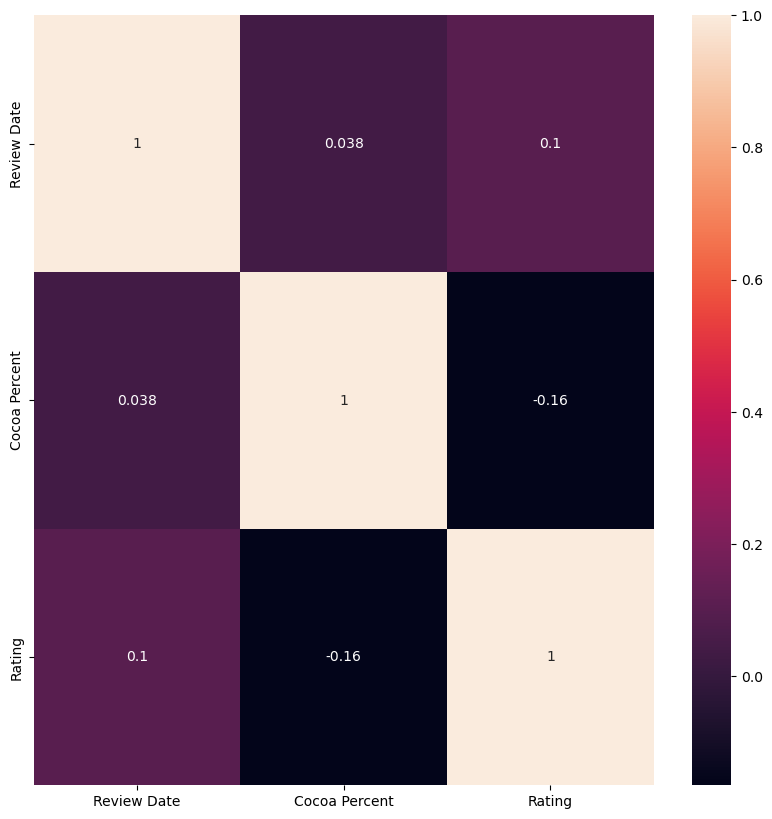

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
df_corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

There are not any particularly strong correlations between these variables. The strongest is cocoa percentage and the rating, as expected.

### Scatterplots

ValueError: could not convert string to float: '63%'

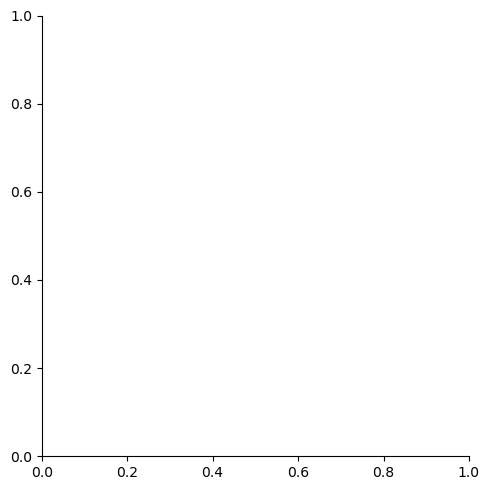

In [13]:
# create a scatterplot
sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = df)

correlation shows that higher rating with higher percentage.

### Pair Plot

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

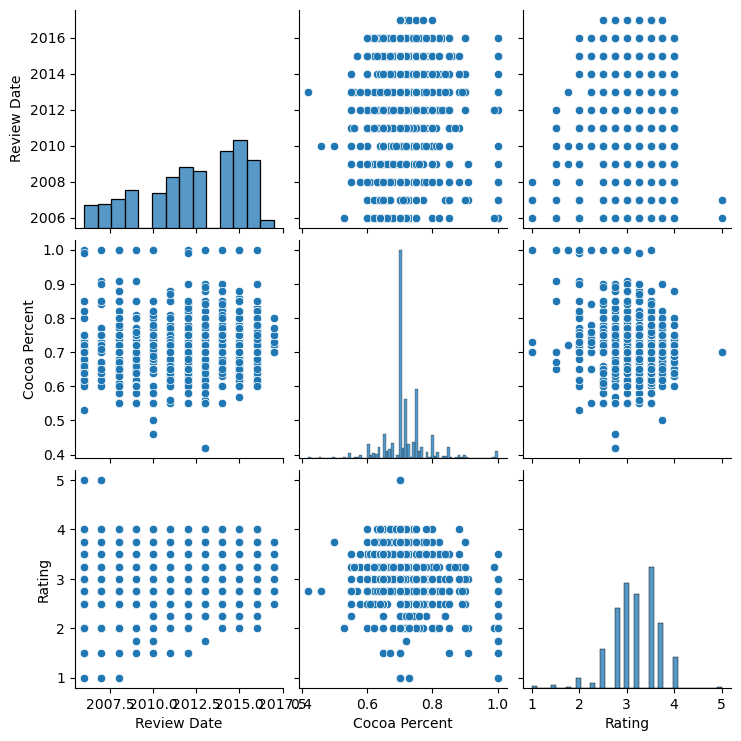

In [14]:
# Creating a pairplot
pair_plot = sns.pairplot(df_sub)

From this pair plot we can identify that there are still some potential outliers. We can see the cocoa percent and rating has stronger correlation. It's interesting to see the review dates and and the ratings, did it matter based on when it was taste rated? Does the taste rater have different tastes in the later years?

In [15]:
# Export visualization
pair_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

### Categorical Plot 

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cocoa Percent', ylabel='Count'>

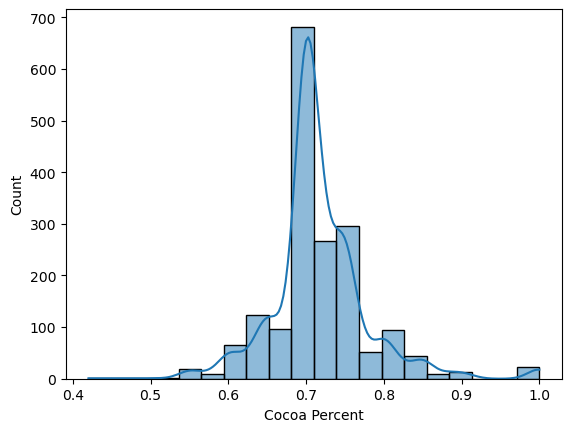

In [16]:
sns.histplot(df_sub['Cocoa Percent'],bins = 20, kde = True)

In [17]:
#Apply flags
df_sub.loc[df_sub['Cocoa Percent'] >= .8, 'Cocoa Percent Range'] = 'High Range'

C:\Users\nicol\AppData\Local\Temp\ipykernel_32392\2222503330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['Cocoa Percent'] >= .8, 'Cocoa Percent Range'] = 'High Range'
C:\Users\nicol\AppData\Local\Temp\ipykernel_32392\2222503330.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High Range' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sub.loc[df_sub['Cocoa Percent'] >= .8, 'Cocoa Percent Range'] = 'High Range'


In [18]:
df_sub.loc[(df_sub['Cocoa Percent'] > .7) & (df_sub['Cocoa Percent'] < .8), 'Cocoa Percent Range'] = 'Middle Range'

In [19]:
df_sub.loc[df_sub['Cocoa Percent'] <= .6, 'Cocoa Percent Range'] = 'Low Range'

In [20]:
df_sub['Cocoa Percent Range'].value_counts(dropna = False)

Cocoa Percent Range
NaN             926
Middle Range    612
High Range      183
Low Range        74
Name: count, dtype: int64

In [21]:
# Export df to cocoa_range
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cocoa_range.csv'))

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

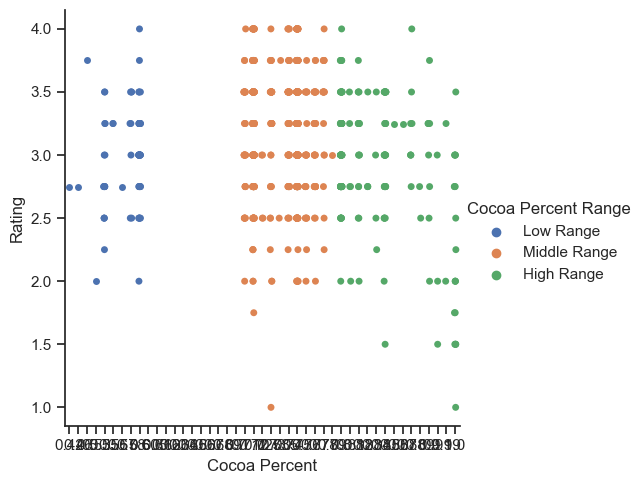

In [22]:
# Creating categorical plot with GDP per Capita
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='Cocoa Percent', y='Rating', hue="Cocoa Percent Range", data=df_sub)

In [23]:
# export bar graph
cat_plot_GDP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_range.png'))

the categorical plot is very similar to the scatterplot. I would have expected that the higher the Cocoa Percent Range, the higher the rating. It appears that in every range of cocoa percent, the rating can be from high to low. 

##### I hypothesize that the higher the Cocoa Percentage, the lower the average rating.